# Integração numérica: quadratura Gaussiana

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt

Vamos implementar abaixo o código para gerar a tabela de pontos (nós) e pesos para integração numérica consoante as fórmulas de quadratura de **Gauss-Legendre**. 

In [2]:
import numpy.polynomial.legendre as leg
import numpy as np

# número de pontos de quadratura
n = 8

# pontos e pesos
(pontos,pesos) = leg.leggauss(n)        

Isto é, para a regra de 2 pontos, os nós de Gauss-Legendre são

In [3]:
print(pontos)

[-0.96028986 -0.79666648 -0.52553241 -0.18343464  0.18343464  0.52553241
  0.79666648  0.96028986]


e os pesos correspondentes são:

In [4]:
print(pesos)

[0.10122854 0.22238103 0.31370665 0.36268378 0.36268378 0.31370665
 0.22238103 0.10122854]


In [5]:
F = lambda x: (5*x + 7)/(np.exp(5*x + 7))


np.sum(F(np.asarray(pontos))*np.asarray(pesos))*5

0.40592599606029545

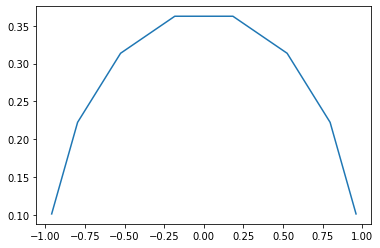

In [6]:
plt.plot(pontos,pesos)
plt.autoscale;

### Tabela de pesos/pontos - Quadratura de Gauss-Legendre

Para gerarmos uma tabela de pontos e pesos, basta fazer:

In [7]:
# número máximo de pontos
N = 16

for i in range(1,N+1):
    (pontos,pesos) = leg.leggauss(i)       
    print('REGRA DE {0} PONTO(S):\n-> Pontos:'.format(i))
    print(pontos)
    print('-> Pesos:')
    print(pesos)
    print('\n')


REGRA DE 1 PONTO(S):
-> Pontos:
[0.]
-> Pesos:
[2.]


REGRA DE 2 PONTO(S):
-> Pontos:
[-0.57735027  0.57735027]
-> Pesos:
[1. 1.]


REGRA DE 3 PONTO(S):
-> Pontos:
[-0.77459667  0.          0.77459667]
-> Pesos:
[0.55555556 0.88888889 0.55555556]


REGRA DE 4 PONTO(S):
-> Pontos:
[-0.86113631 -0.33998104  0.33998104  0.86113631]
-> Pesos:
[0.34785485 0.65214515 0.65214515 0.34785485]


REGRA DE 5 PONTO(S):
-> Pontos:
[-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
-> Pesos:
[0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]


REGRA DE 6 PONTO(S):
-> Pontos:
[-0.93246951 -0.66120939 -0.23861919  0.23861919  0.66120939  0.93246951]
-> Pesos:
[0.17132449 0.36076157 0.46791393 0.46791393 0.36076157 0.17132449]


REGRA DE 7 PONTO(S):
-> Pontos:
[-0.94910791 -0.74153119 -0.40584515  0.          0.40584515  0.74153119
  0.94910791]
-> Pesos:
[0.12948497 0.27970539 0.38183005 0.41795918 0.38183005 0.27970539
 0.12948497]


REGRA DE 8 PONTO(S):
-> Pontos:
[-0.96028986 -0.796

A partir daí, podemos organizar uma tabela para a regra de até 8 pontos/pesos como segue:

In [8]:
# número máximo de pontos
N = 8

header='| Regra | nó(s) | peso(s) |\n|---|---|---|'
print(header)
for i in range(1,N+1):
    (pontos,pesos) = leg.leggauss(i)       
    p = ', '.join([str(p) for p in pontos])
    w = ', '.join([str(p) for p in pesos])    
    row = '|' + str(i) + '|' + p + '|' + w + '|'
    print(row)                   

| Regra | nó(s) | peso(s) |
|---|---|---|
|1|0.0|2.0|
|2|-0.5773502691896257, 0.5773502691896257|1.0, 1.0|
|3|-0.7745966692414834, 0.0, 0.7745966692414834|0.5555555555555557, 0.8888888888888888, 0.5555555555555557|
|4|-0.8611363115940526, -0.33998104358485626, 0.33998104358485626, 0.8611363115940526|0.3478548451374537, 0.6521451548625462, 0.6521451548625462, 0.3478548451374537|
|5|-0.906179845938664, -0.5384693101056831, 0.0, 0.5384693101056831, 0.906179845938664|0.23692688505618942, 0.4786286704993662, 0.568888888888889, 0.4786286704993662, 0.23692688505618942|
|6|-0.932469514203152, -0.6612093864662645, -0.23861918608319693, 0.23861918608319693, 0.6612093864662645, 0.932469514203152|0.17132449237916975, 0.36076157304813894, 0.46791393457269137, 0.46791393457269137, 0.36076157304813894, 0.17132449237916975|
|7|-0.9491079123427585, -0.7415311855993945, -0.4058451513773972, 0.0, 0.4058451513773972, 0.7415311855993945, 0.9491079123427585|0.12948496616887065, 0.2797053914892766, 0.3818300

#### Tabela de quadratura de Gauss-Legendre 
| Regra | nó(s) | peso(s) |
|---|---|---|
|1|0.0|2.0|
|2|-0.57735026919, 0.57735026919|1.0, 1.0|
|3|-0.774596669241, 0.0, 0.774596669241|0.555555555556, 0.888888888889, 0.555555555556|
|4|-0.861136311594, -0.339981043585, 0.339981043585, 0.861136311594|0.347854845137, 0.652145154863, 0.652145154863, 0.347854845137|
|5|-0.906179845939, -0.538469310106, 0.0, 0.538469310106, 0.906179845939|0.236926885056, 0.478628670499, 0.568888888889, 0.478628670499, 0.236926885056|
|6|-0.932469514203, -0.661209386466, -0.238619186083, 0.238619186083, 0.661209386466, 0.932469514203|0.171324492379, 0.360761573048, 0.467913934573, 0.467913934573, 0.360761573048, 0.171324492379|
|7|-0.949107912343, -0.741531185599, -0.405845151377, 0.0, 0.405845151377, 0.741531185599, 0.949107912343|0.129484966169, 0.279705391489, 0.381830050505, 0.417959183673, 0.381830050505, 0.279705391489, 0.129484966169|
|8|-0.960289856498, -0.796666477414, -0.525532409916, -0.183434642496, 0.183434642496, 0.525532409916, 0.796666477414, 0.960289856498|0.10122853629, 0.222381034453, 0.313706645878, 0.362683783378, 0.362683783378, 0.313706645878, 0.222381034453, 0.10122853629|

## Transformação de variáveis

Uma integral $\int_a^b f(x) \, dx$ sobre $[a,b]$ arbitrário ser transformada em uma integral em $[-1,1]$ utilizando a mudança de variáveis:

$$t = \dfrac{2x - a - b}{b - a} \Rightarrow x = \dfrac{1}{2}[(b-a)t + a + b]$$

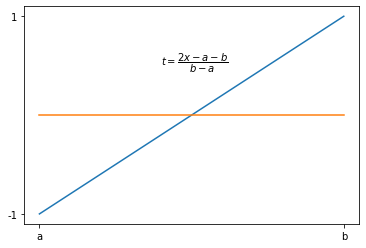

In [9]:
x = np.linspace(2,4)
y = x - 3
plt.plot(x,y);
plt.plot(x,x*0);
plt.xticks([2,4],['a','b']);
plt.yticks([-1,1],['-1','1']);
plt.annotate('$t = \dfrac{2x - a - b}{b - a}$',(2.8,0.5));


### Tarefa 

Defina uma função como a seguinte que retorne `output`, tal que `type(output)` seja `str`. 
```python
def print_gauss_legendre_table(N):
    header='| Regra | nó(s) | peso(s) |\n|---|---|---|'
    print(header)
    for i in range(1,N+1):
        (pontos,pesos) = leg.leggauss(i)       
        p = ', '.join([str(p) for p in pontos])
        w = ', '.join([str(p) for p in pesos])    
        row = '|' + str(i) + '|' + p + '|' + w + '|'
        print(row)             
```

Então, reimprima a tabela para 8 pesos/pontos anterior com o código. 

```
output = print_gauss_legendre_table(8)
```

Em seguida, use o código abaixo para converter a saída da célula de código do Jupyter diretamente para Markdown. 
```python
from IPython.display import display, Markdown
display(Markdown(output))
```

Por último, incorpore esta funcionalidade em `print_gauss_legendre_table(N)`, para `N` dado.

| Regra | nó(s) | peso(s) |
|---|---|---|
|1|0.0|2.0|
|2|-0.57735026919, 0.57735026919|1.0, 1.0|
|3|-0.774596669241, 0.0, 0.774596669241|0.555555555556, 0.888888888889, 0.555555555556|
|4|-0.861136311594, -0.339981043585, 0.339981043585, 0.861136311594|0.347854845137, 0.652145154863, 0.652145154863, 0.347854845137|
|5|-0.906179845939, -0.538469310106, 0.0, 0.538469310106, 0.906179845939|0.236926885056, 0.478628670499, 0.568888888889, 0.478628670499, 0.236926885056|
|6|-0.932469514203, -0.661209386466, -0.238619186083, 0.238619186083, 0.661209386466, 0.932469514203|0.171324492379, 0.360761573048, 0.467913934573, 0.467913934573, 0.360761573048, 0.171324492379|
|7|-0.949107912343, -0.741531185599, -0.405845151377, 0.0, 0.405845151377, 0.741531185599, 0.949107912343|0.129484966169, 0.279705391489, 0.381830050505, 0.417959183673, 0.381830050505, 0.279705391489, 0.129484966169|
|8|-0.960289856498, -0.796666477414, -0.525532409916, -0.183434642496, 0.183434642496, 0.525532409916, 0.796666477414, 0.960289856498|0.10122853629, 0.222381034453, 0.313706645878, 0.362683783378, 0.362683783378, 0.313706645878, 0.222381034453, 0.10122853629|
|9|-0.968160239508, -0.836031107327, -0.613371432701, -0.324253423404, 0.0, 0.324253423404, 0.613371432701, 0.836031107327, 0.968160239508|0.0812743883616, 0.180648160695, 0.260610696403, 0.31234707704, 0.330239355001, 0.31234707704, 0.260610696403, 0.180648160695, 0.0812743883616|
|10|-0.973906528517, -0.865063366689, -0.679409568299, -0.433395394129, -0.148874338982, 0.148874338982, 0.433395394129, 0.679409568299, 0.865063366689, 0.973906528517|0.0666713443087, 0.149451349151, 0.219086362516, 0.26926671931, 0.295524224715, 0.295524224715, 0.26926671931, 0.219086362516, 0.149451349151, 0.0666713443087|
|11|-0.978228658146, -0.887062599768, -0.730152005574, -0.519096129207, -0.269543155952, 0.0, 0.269543155952, 0.519096129207, 0.730152005574, 0.887062599768, 0.978228658146|0.0556685671162, 0.125580369465, 0.186290210928, 0.233193764592, 0.26280454451, 0.272925086778, 0.26280454451, 0.233193764592, 0.186290210928, 0.125580369465, 0.0556685671162|
|12|-0.981560634247, -0.90411725637, -0.769902674194, -0.587317954287, -0.367831498998, -0.125233408511, 0.125233408511, 0.367831498998, 0.587317954287, 0.769902674194, 0.90411725637, 0.981560634247|0.0471753363865, 0.106939325995, 0.160078328543, 0.203167426723, 0.233492536538, 0.249147045813, 0.249147045813, 0.233492536538, 0.203167426723, 0.160078328543, 0.106939325995, 0.0471753363865|

In [10]:
from IPython.core.display import HTML

def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling();